# Clasificación — PlayStation Sales and Metadata (PS3/PS4/PS5)

se realiza la carga de la base de datos local, y se realiza preprocesamiento automático, usando **Regresión Logística**
y **Árbol de Decisión**, y realiza una comparación con métricas y gráficas.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp313-cp313

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4"
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U"


Columnas numéricas: ['Total Shipped', 'Total Sales', 'NA Sales', 'PAL Sales', 'Japan Sales', 'Other Sales', 'rating', 'ratings_count', 'metacritic']
Columnas categóricas: ['Game', 'Console', 'Name', 'Publisher', 'Developer', 'Release Date', 'Last Update', 'genres', 'platforms']
Columna objetivo seleccionada: Total Sales
Mediana: 0.0 — umbral usado para 'is_hit': 1.0
Features seleccionadas: ['Other Sales', 'PAL Sales', 'NA Sales', 'ratings_count', 'Japan Sales', 'metacritic', 'Console']


,Other Sales,PAL Sales,NA Sales,ratings_count,Japan Sales,metacritic,Console
0,3120000.0,9850000.0,6370000.0,7225.0,990000.0,92.0,0
1,3020000.0,9710000.0,6060000.0,7225.0,600000.0,92.0,1
2,2440000.0,6050000.0,6180000.0,44.0,410000.0,76.0,1
3,2260000.0,6210000.0,5260000.0,5357.0,210000.0,96.0,1
4,2280000.0,5880000.0,4990000.0,1417.0,650000.0,74.0,0


Accuracy Logistic Regression: 0.9315206445115811
Accuracy Decision Tree: 1.0

Classification report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       545
           1       0.99      0.85      0.92       448

    accuracy                           0.93       993
   macro avg       0.94      0.92      0.93       993
weighted avg       0.94      0.93      0.93       993


Classification report - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       448

    accuracy                           1.00       993
   macro avg       1.00      1.00      1.00       993
weighted avg       1.00      1.00      1.00       993



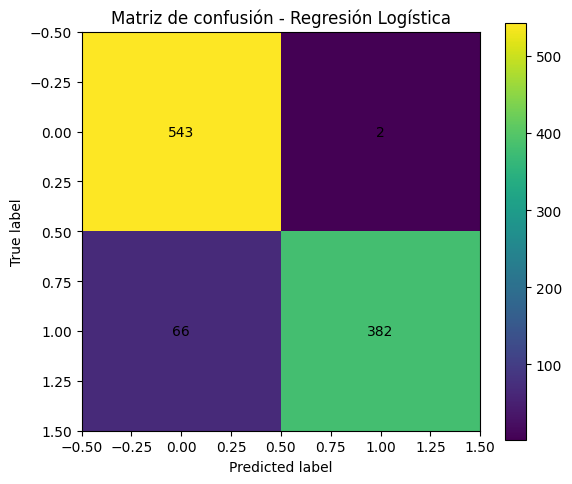

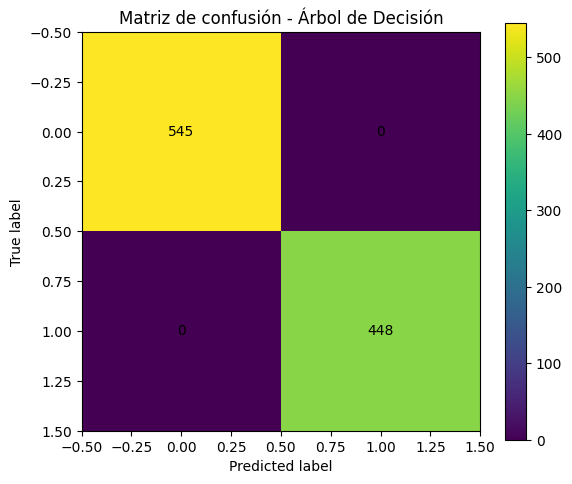

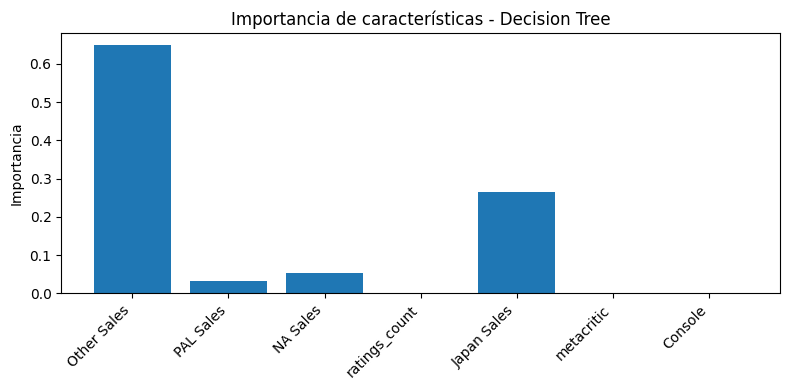

Notebook terminado. Ajusta el umbral o la columna objetivo si deseas otra definición de 'éxito' (is_hit).


In [ ]:

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# RUTA del archivo (modifica si es necesario)
file_path = r"C:\Users\nitro\Downloads\PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv"

print("Intentando cargar:", file_path)
if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo en la ruta especificada: {file_path}.\nAsegúrate de que la ruta y el nombre de archivo sean correctos y que el archivo esté accesible desde este entorno.")

df = pd.read_csv(file_path)
print("Archivo cargado correctamente. Filas, columnas:", df.shape)
display(df.head())

# --- Preprocesamiento automático ---
data = df.copy()

# Detectar columnas numéricas y categóricas
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

# Seleccionar columna objetivo numérica (automático)
target_col = None
for c in data.columns:
    if 'global' in c.lower() and 'sale' in c.lower():
        target_col = c
        break
if target_col is None:
    for c in data.columns:
        if ('total' in c.lower() and 'sale' in c.lower()) or ('sales' in c.lower() and 'global' in c.lower()):
            target_col = c
if target_col is None and len(num_cols)>0:
    target_col = num_cols[-1]
if target_col is None:
    raise RuntimeError("No se pudo determinar una columna objetivo numérica automáticamente. Edita el notebook para indicar la columna objetivo.")

print("Columna objetivo seleccionada:", target_col)

# Convertir a numérico y crear etiqueta binaria 'is_hit'
y_numeric = pd.to_numeric(data[target_col], errors='coerce')
median_val = y_numeric.median()
if median_val < 50:
    threshold = 1.0
else:
    threshold = median_val
print(f"Mediana: {median_val} — umbral usado para 'is_hit': {threshold}")

data['is_hit'] = (y_numeric >= threshold).astype(int)

# Selección automática de features: top correlacionadas + categóricas de baja cardinalidad
features_candidates = [c for c in num_cols if c != target_col]
corr_df = data[features_candidates + [target_col]].corr().abs()
if target_col in corr_df.columns:
    corrs = corr_df[target_col].drop(target_col).sort_values(ascending=False)
    top_num_features = corrs.head(6).index.tolist()
else:
    top_num_features = features_candidates[:6]
selected_features = top_num_features.copy()

cat_to_add = []
for c in cat_cols:
    if c not in selected_features and data[c].nunique() <= 30:
        cat_to_add.append(c)
    if len(cat_to_add) >= 4:
        break
selected_features += cat_to_add
print("Features seleccionadas:", selected_features)

# Preparar X, y
X = data[selected_features].copy()
y = data['is_hit']

# Rellenar nulos y codificar categóricas
from sklearn.preprocessing import LabelEncoder
for col in X.columns:
    if X[col].dtype in ['int64','float64']:
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna(X[col].mode().iloc[0]).astype(str)
        X[col] = LabelEncoder().fit_transform(X[col])

display(X.head())

# Split y escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=6)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Logistic Regression:", acc_log)
print("Accuracy Decision Tree:", acc_tree)
print("\nClassification report - Logistic Regression:\n", classification_report(y_test, y_pred_log, zero_division=0))
print("\nClassification report - Decision Tree:\n", classification_report(y_test, y_pred_tree, zero_division=0))

# Matrices de confusión plots (cada una en su propia figura)
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,5))
plt.imshow(cm_log, interpolation='nearest')
plt.title('Matriz de confusión - Regresión Logística')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
for (i, j), val in np.ndenumerate(cm_log):
    plt.text(j, i, int(val), ha='center', va='center')
plt.tight_layout()
plt.show()

cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,5))
plt.imshow(cm_tree, interpolation='nearest')
plt.title('Matriz de confusión - Árbol de Decisión')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
for (i, j), val in np.ndenumerate(cm_tree):
    plt.text(j, i, int(val), ha='center', va='center')
plt.tight_layout()
plt.show()

# Importancias (árbol)
plt.figure(figsize=(8,4))
importances = tree_clf.feature_importances_
plt.bar(range(len(selected_features)), importances)
plt.xticks(range(len(selected_features)), selected_features, rotation=45, ha='right')
plt.ylabel('Importancia')
plt.title('Importancia de características - Decision Tree')
plt.tight_layout()
plt.show()

print("Notebook terminado. Ajusta el umbral o la columna objetivo si deseas otra definición de 'éxito' (is_hit).")
